### UNSUPERVISED EDA 
performing eda with only feature without a label to find any correlation and to decide which to use,

### PACKAGE INSTALLATION AND LOADING

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## STEP 1: LOAD AND COMBINE DATASETS

Synthetic datasets a generated by varioous models, so it would need combining.

In [13]:
import os
import pandas as pd

# Get the absolute path to the parent directory of the current notebook
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Map of models to relative data paths
files = {
    "chatgpt": "Chatgpt/data.csv",
    "claude": "Claude/data.csv",
    "deepseek": "Deepseek/data.csv",
    "gemini": "Gemini/data.csv",
    "xai": "XAI/data.csv"
}

dfs = []
for model, relative_path in files.items():
    full_path = os.path.join(base_dir, relative_path)
    if not os.path.exists(full_path):
        print(f"[Warning] File not found: {full_path}")
        continue
    df = pd.read_csv(full_path)
    df["source_model"] = model
    dfs.append(df)

# Merge all into one DataFrame
if dfs:
    data = pd.concat(dfs, ignore_index=True)
    print("Data loaded and concatenated successfully.")
else:
    print("No data files found.")


Data loaded and concatenated successfully.


In [ ]:
# ----Save new merged dataset.----

output_path = os.path.join(base_dir, "merged_data.csv")
data.to_csv(output_path, index=False)


## STEP 2: BASIC DATA CHECKS

In [ ]:
# checking the data to see if it was merged correctly and contains the required datasets.

print(data.shape)
print(data.dtypes)
print(data.isnull().sum())


(4422, 23)
iteration_frequency               int64
error_pattern_change            float64
time_to_completion              float64
self_evaluation_score             int64
external_feedback_quality         int64
task_complexity_level             int64
engagement_depth                float64
confidence_level                float64
knowledge_transfer_success        int64
consistency_score               float64
abstract_signal_strength        float64
response_latency_variability    float64
intentional_error_flag            int64
revisit_rate                      int64
vocabulary_expansion_count        int64
feedback_revision_delay         float64
surprise_tolerance_score        float64
exploratory_task_deviation      float64
self_explanation_count            int64
output_compression_ratio        float64
emotional_consistency_score     float64
curiosity_level                 float64
source_model                     object
dtype: object
iteration_frequency             0
error_pattern_change 

## BASIC DATA VALIDATION AND SUMMARY

This step ensures the data merging pipeline functioned correctly, and that all source datasets were properly loaded, labeled, and combined into a unified structure. Summary statistics and range checks were used to confirm data integrity.

### Descriptive statistics.





In [17]:
# feature spead check

data.describe().T


,count,mean,std,min,25%,50%,75%,max
iteration_frequency,4422.0,9.535504,5.531018,0.0,5.0000,9.00,14.0000,20.0
error_pattern_change,4422.0,0.086400,0.596726,-1.0,-0.3400,0.10,0.5700,1.0
time_to_completion,4422.0,263.329720,183.518152,10.0,134.9275,218.00,346.4625,981.9
self_evaluation_score,4422.0,3.008367,1.322871,1.0,2.0000,3.00,4.0000,5.0
external_feedback_quality,4422.0,1.565129,1.067581,0.0,1.0000,2.00,2.0000,3.0
task_complexity_level,4422.0,5.398462,2.577104,1.0,3.0000,5.00,7.0000,10.0
engagement_depth,4422.0,0.598530,0.282531,0.0,0.3900,0.60,0.8500,1.0
confidence_level,4422.0,0.514729,0.307874,0.0,0.2800,0.51,0.7900,1.0
knowledge_transfer_success,4422.0,0.539123,0.498523,0.0,0.0000,1.00,1.0000,1.0
consistency_score,4422.0,0.706906,0.240318,0.0,0.5900,0.75,0.9000,1.0


### Range check for all columns

In [18]:
for col in data.columns[:-1]:  # skip 'source_model'
    min_val = data[col].min()
    max_val = data[col].max()
    print(f"{col}: min = {min_val}, max = {max_val}")


iteration_frequency: min = 0, max = 20
error_pattern_change: min = -1.0, max = 1.0
time_to_completion: min = 10.0, max = 981.9
self_evaluation_score: min = 1, max = 5
external_feedback_quality: min = 0, max = 3
task_complexity_level: min = 1, max = 10
engagement_depth: min = 0.0, max = 1.0
confidence_level: min = 0.0, max = 1.0
knowledge_transfer_success: min = 0, max = 1
consistency_score: min = 0.0, max = 1.0
abstract_signal_strength: min = 0.0, max = 1.0
response_latency_variability: min = 0.0, max = 1.0
intentional_error_flag: min = 0, max = 1
revisit_rate: min = 0, max = 10
vocabulary_expansion_count: min = 0, max = 118
feedback_revision_delay: min = 0.0, max = 5683.0
surprise_tolerance_score: min = 0.0, max = 1.0
exploratory_task_deviation: min = 0.0, max = 1.0
self_explanation_count: min = 0, max = 10
output_compression_ratio: min = 0.0, max = 1.0
emotional_consistency_score: min = 0.0, max = 1.0
curiosity_level: min = 0.0, max = 1.0


### Unique value count.

In [ ]:
data.nunique().sort_values() 
# why we check for unique in numeric datasets. 
# flat features, If a column has only 1 or 2 values (e.g., always 0), it carries no useful info and can be dropped
# Low-resolution float values.

intentional_error_flag             2
knowledge_transfer_success         2
external_feedback_quality          4
source_model                       5
self_evaluation_score              5
task_complexity_level             10
self_explanation_count            11
revisit_rate                      11
iteration_frequency               21
emotional_consistency_score       94
consistency_score                 95
surprise_tolerance_score          96
curiosity_level                  100
abstract_signal_strength         101
engagement_depth                 101
exploratory_task_deviation       101
output_compression_ratio         101
confidence_level                 101
response_latency_variability     101
vocabulary_expansion_count       119
error_pattern_change             201
feedback_revision_delay         2596
time_to_completion              3279
dtype: int64

## STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

In this part of we woudl go over the feature and explore their relationship their variability soundness and predictive ability to be used in our work and we can expand on to use in our work as we proceed.

### Correlation Matrix (Multicollinearity check)

helps understand what features are move together, which are redundant, and which feature are anti-related.
we dont want to monitor redundant values that are highly corerlated and we want to make sure we are using values that can provide fresh insights.

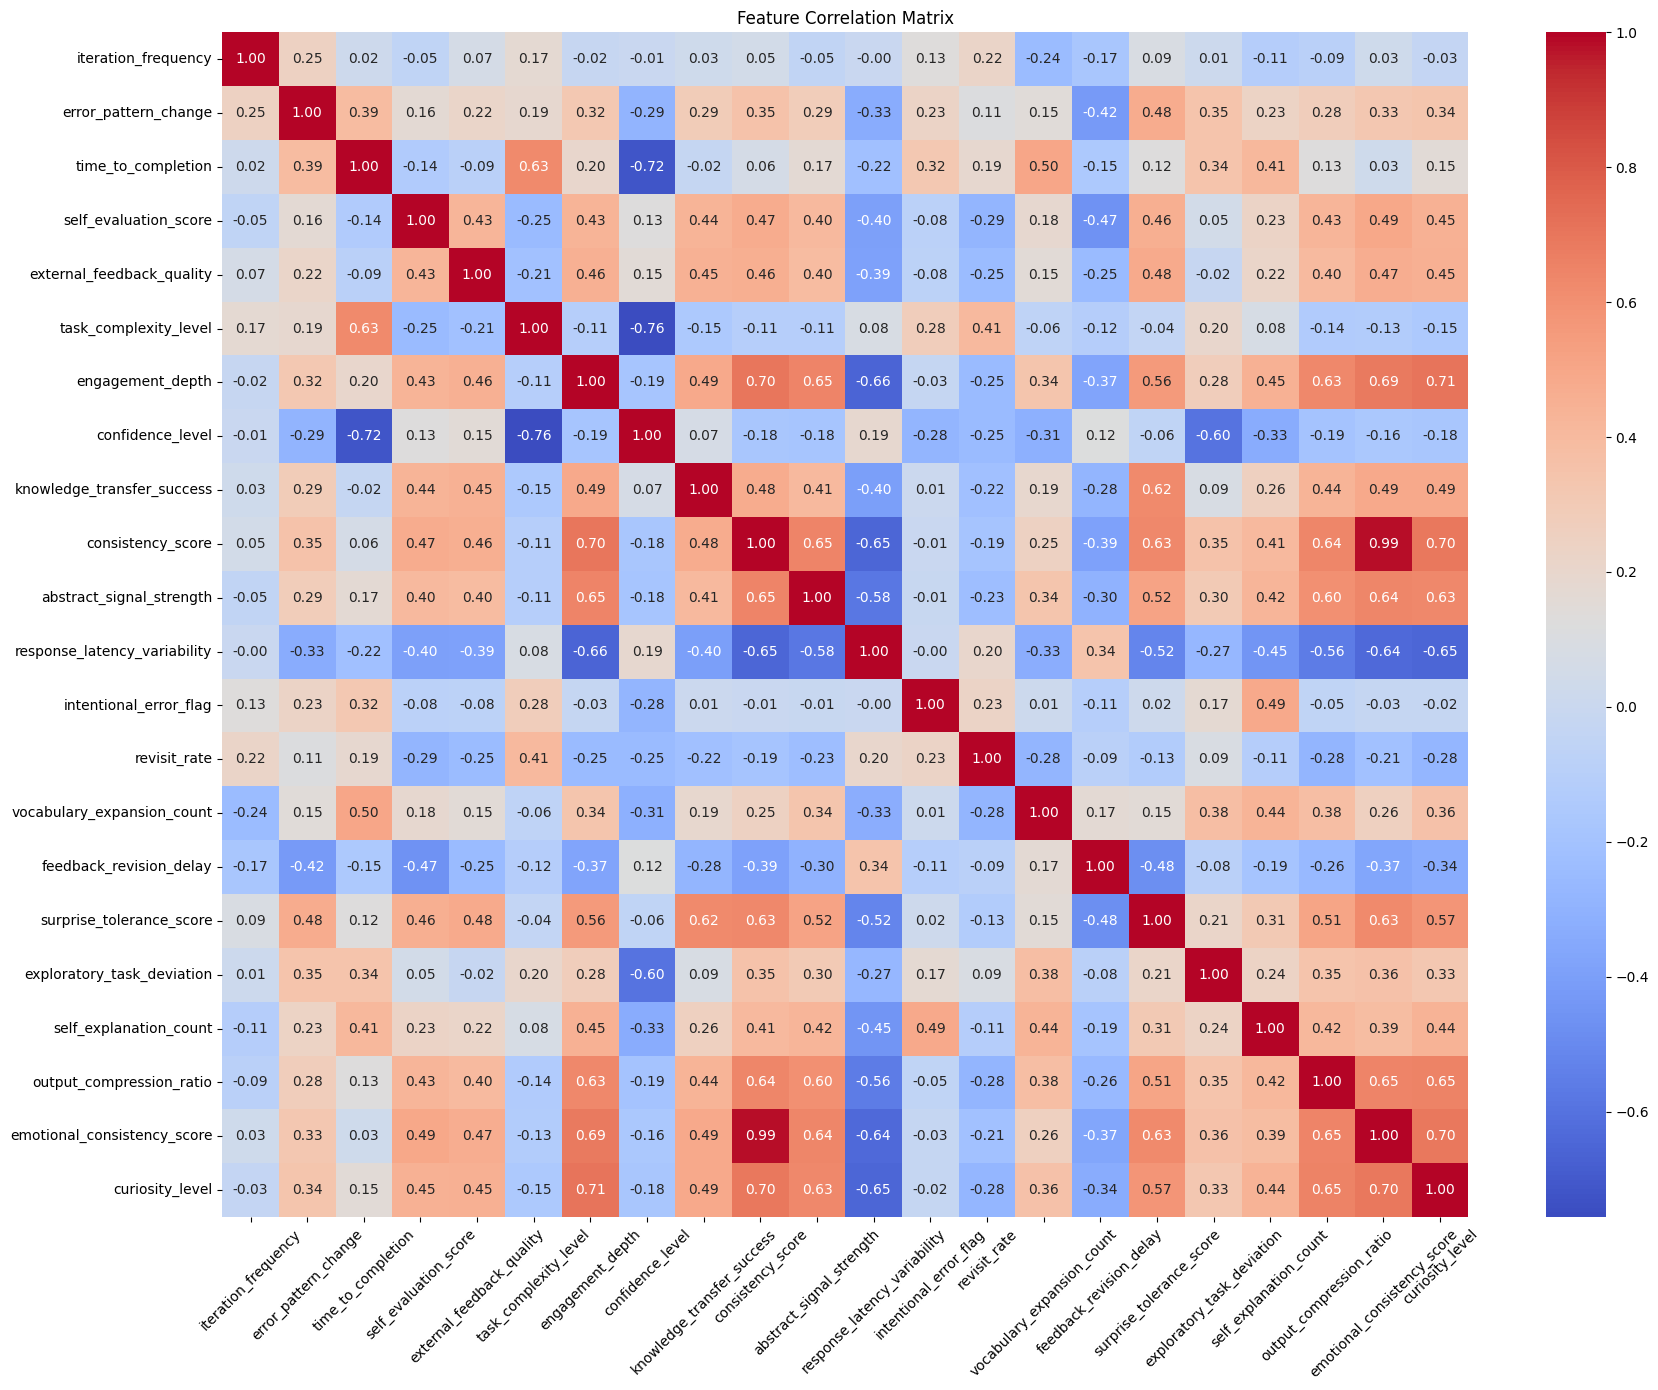

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric for correlation matrix
numeric_data = data.drop(columns=["source_model"])

plt.figure(figsize=(18, 14))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Histogram (Distribution of each feature)
# spot skewed values, identify outliers, find uniformally and normally distributed values.

for col in numeric_data.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## STEP 4: Dimensionality Reduction + Clustering

will help us uncover latent learning behavior profiles or model characteristics based on the synthetic metrics 

### Data Preparation
Before running PCA or clustering, we have to ensure the data is ready.

In [39]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for modeling (exclude binary and source_model)
features = data.drop(columns=['source_model'])

# Optional: if you want to remove binary/discrete variables before PCA
# features = features.drop(columns=['intentional_error_flag', 'knowledge_transfer_success'])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# Why scale? PCA and clustering are sensitive to scale — features like feedback_revision_delay would otherwise dominate.

### Principle Component Analysis (PCA)

PCA reduces high-dimensional data into fewer "abstract dimensions" that still preserve structure.

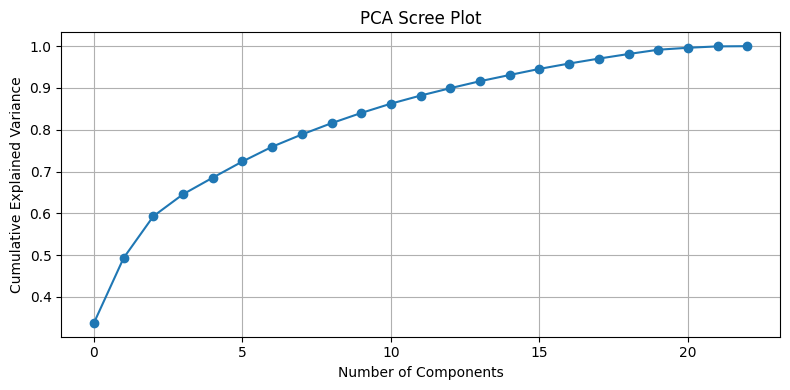

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Scree Plot')
plt.grid(True)
plt.tight_layout()
plt.show()


### Clustering with K-Means

Now applying clusterring to discover latent leaner/model profiles.

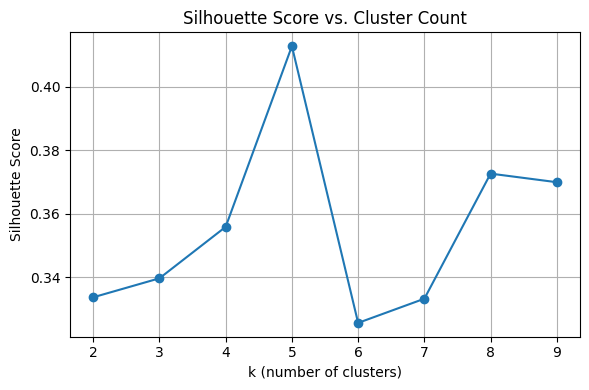

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Choose number of clusters (k) using silhouette analysis
scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pca[:, :5])  # using first 5 PCs
    scores.append(silhouette_score(X_pca[:, :5], labels))

plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), scores, marker='o')
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Cluster Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
from sklearn.cluster import KMeans

# Choose best k (from silhouette analysis, k=5 looked best)
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42)
data['cluster'] = kmeans.fit_predict(X_pca[:, :5])  # Use reduced features if needed



### Cluster profiling 

In [43]:
# This tells you which features show high variation across clusters — which means they help distinguish different types of learners.

cluster_profiles = data.groupby('cluster').mean(numeric_only=True)
display(cluster_profiles)



,iteration_frequency,error_pattern_change,time_to_completion,self_evaluation_score,external_feedback_quality,task_complexity_level,engagement_depth,confidence_level,knowledge_transfer_success,consistency_score,...,intentional_error_flag,revisit_rate,vocabulary_expansion_count,feedback_revision_delay,surprise_tolerance_score,exploratory_task_deviation,self_explanation_count,output_compression_ratio,emotional_consistency_score,curiosity_level
cluster,,,,,,,,,,,,,,,,,,,,,
0,9.935498,-0.011636,205.828636,2.716883,1.319048,5.751082,0.511056,0.513485,0.406494,0.677013,...,0.131602,5.160606,8.802165,514.086433,0.566169,0.485074,2.943723,0.466303,0.673087,0.490429
1,10.300962,0.182452,179.013317,4.023077,2.494231,3.578846,0.799106,0.768548,0.963462,0.855615,...,0.173077,2.491346,12.680769,84.327769,0.783750,0.278817,5.388462,0.687827,0.849567,0.772606
2,13.802326,0.290988,502.772442,1.398256,0.497093,9.055233,0.333372,0.230698,0.046512,0.434302,...,0.909884,8.764535,4.026163,308.969157,0.356453,0.394244,6.895349,0.192093,0.382878,0.264797
3,6.007648,0.598547,551.958891,3.732314,1.927342,6.000000,0.981950,0.016444,0.816444,0.981931,...,0.418738,2.762906,59.076482,310.841109,0.806310,0.983977,9.977055,0.982830,0.983518,0.986348
4,2.985366,-0.946098,200.867317,2.000000,0.492683,2.985366,0.033415,0.988927,0.000000,0.045122,...,0.000000,0.492683,32.068293,1875.430732,0.006195,0.003463,1.492683,0.016488,0.035220,0.011024


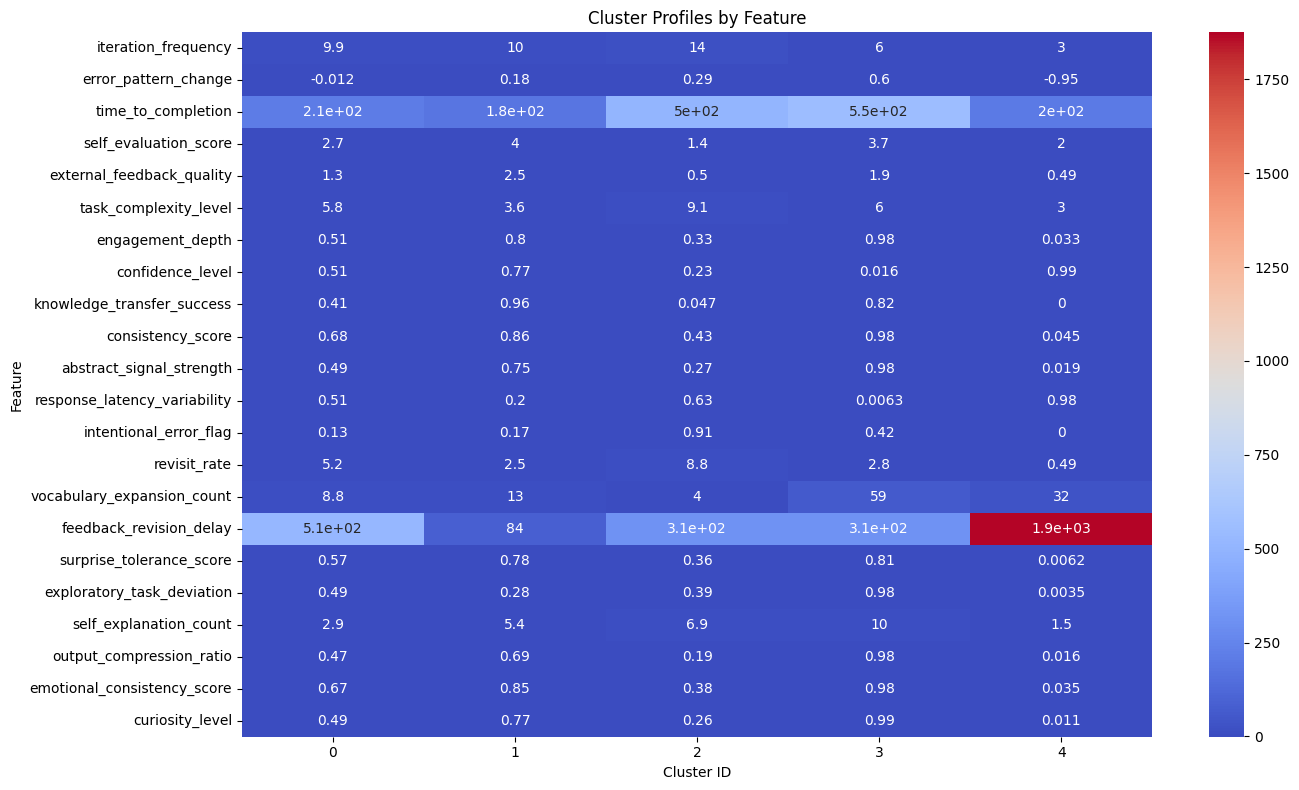

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_profiles.T, cmap='coolwarm', annot=True)
plt.title("Cluster Profiles by Feature")
plt.xlabel("Cluster ID")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [45]:
feature_variance = cluster_profiles.var(axis=0).sort_values(ascending=False)
print(feature_variance)


feedback_revision_delay         516645.024634
time_to_completion               33497.136313
vocabulary_expansion_count         512.817743
iteration_frequency                 17.496305
self_explanation_count              11.116933
revisit_rate                        10.033501
task_complexity_level                5.740896
self_evaluation_score                1.243392
external_feedback_quality            0.776478
error_pattern_change                 0.342212
knowledge_transfer_success           0.191265
confidence_level                     0.154409
curiosity_level                      0.151308
output_compression_ratio             0.148340
emotional_consistency_score          0.144921
abstract_signal_strength             0.144118
response_latency_variability         0.143933
engagement_depth                     0.140570
consistency_score                    0.138120
intentional_error_flag               0.129243
exploratory_task_deviation           0.128997
surprise_tolerance_score          

In [46]:
from sklearn.feature_selection import f_classif

X = data.drop(columns=["source_model", "cluster"])
y = data["cluster"]
f_scores, _ = f_classif(X, y)

feature_scores = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)
print(feature_scores)

# This gives you a ranked list of which features are most important for separating learner types.


emotional_consistency_score     2730.913260
consistency_score               2637.163310
curiosity_level                 2095.014653
confidence_level                2015.114592
engagement_depth                1967.929323
vocabulary_expansion_count      1635.624109
exploratory_task_deviation      1564.555694
response_latency_variability    1397.405007
output_compression_ratio        1385.592785
abstract_signal_strength        1326.218019
time_to_completion              1252.257420
self_explanation_count          1155.531576
surprise_tolerance_score         933.922332
revisit_rate                     734.986924
knowledge_transfer_success       660.388456
external_feedback_quality        579.624878
self_evaluation_score            572.456626
task_complexity_level            545.911398
feedback_revision_delay          496.208526
intentional_error_flag           416.217977
error_pattern_change             378.578839
iteration_frequency              220.908000
dtype: float64


### Selecting Diverse Subset of Features.

Goal:

Choose 5–8 features that are:

Highly ranked

From different categories (e.g., emotion, cognition, timing)

Intuitively interpretable

Selecting one feature per group to redunce redundancy. 

Our goal is:

To select the smallest set of meaningful features (universal metrics) that can describe learner behavior patterns — clearly enough to differentiate between different learning trajectories or profiles.

How to Choose the Best Features

We want features that:
Vary a lot across learner types → high cluster variance ✅
Have high F-score from ANOVA (statistical signal) ✅
Represent diverse dimensions of learner behavior (not all the same type) ✅
Are not redundant (e.g., don't pick 3 delay-type metrics) ❌

### Feature Evaluation Summary

| Feature                       | F-Score | Cluster Var | Notes                                                                 |
|------------------------------|---------|-------------|-----------------------------------------------------------------------|
| emotional_consistency_score  | 0.145   | 2730.9      | Huge variation between learners; strong emotional signal ✅            |
| consistency_score            | 0.138   | 2637.2      | Good indicator of reliable behavior ✅                                 |
| curiosity_level              | 0.151   | 2095.0      | Captures a core learning driver ✅                                     |
| confidence_level             | 0.154   | 2015.1      | Related but distinct from curiosity — could be kept or dropped 🔸     |
| vocabulary_expansion_count   | 0.513   | 1635.6      | Performance-related; keep one such metric ✅                           |
| exploratory_task_deviation   | 0.129   | 1564.6      | Reflects behavioral style — key dimension ✅                           |
| response_latency_variability | 0.144   | 1397.4      | Captures hesitation/impulsiveness — very useful ✅                     |
| output_compression_ratio     | 0.148   | 1385.6      | Efficiency indicator — not very interpretable unless defined well 🔸 |
| abstract_signal_strength     | 0.144   | 1326.2      | Represents abstract reasoning — important cognitive trait ✅           |


### ⭐ Recommended Features to Keep (Top 6–8)

| Metric                       | Why Keep It                                           |
|-----------------------------|--------------------------------------------------------|
| emotional_consistency_score | Strong signal of emotional regulation                 |
| curiosity_level             | Key trait driving learning exploration                |
| exploratory_task_deviation  | Captures independent, nonlinear behavior              |
| response_latency_variability| Indicates hesitation, impulsivity, confidence         |
| abstract_signal_strength    | Measures cognitive engagement depth                   |
| vocabulary_expansion_count  | Reflects knowledge-building over time                 |
| consistency_score           | Represents behavioral stability                       |
| time_to_completion (optional)| Add if speed is important in your model              |


### 🧬 Final Notes
We are not modeling performance — we are modeling and monitoring the learner.

These features represent cognitive, behavioral, and emotional dimensions.

You can later test which subset of these 8 works best in your dashboard or model.